<a href="https://colab.research.google.com/github/piusneh01/tas-transaksi-pius-hermanto-nehe/blob/main/Praktikum_08_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df=pd.read_csv('drive/MyDrive/TPD/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
plt.style.use('fivethirtyeight')

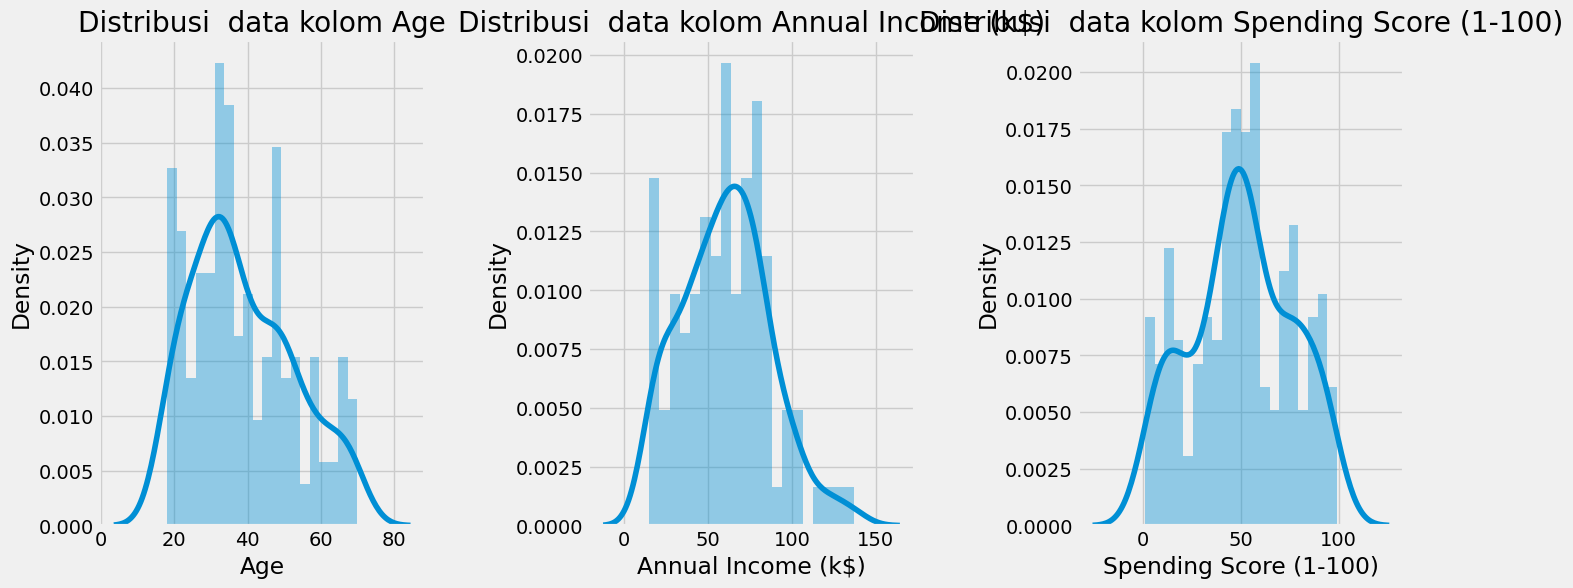

In [22]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distribusi  data kolom {}'.format(x))
plt.show()

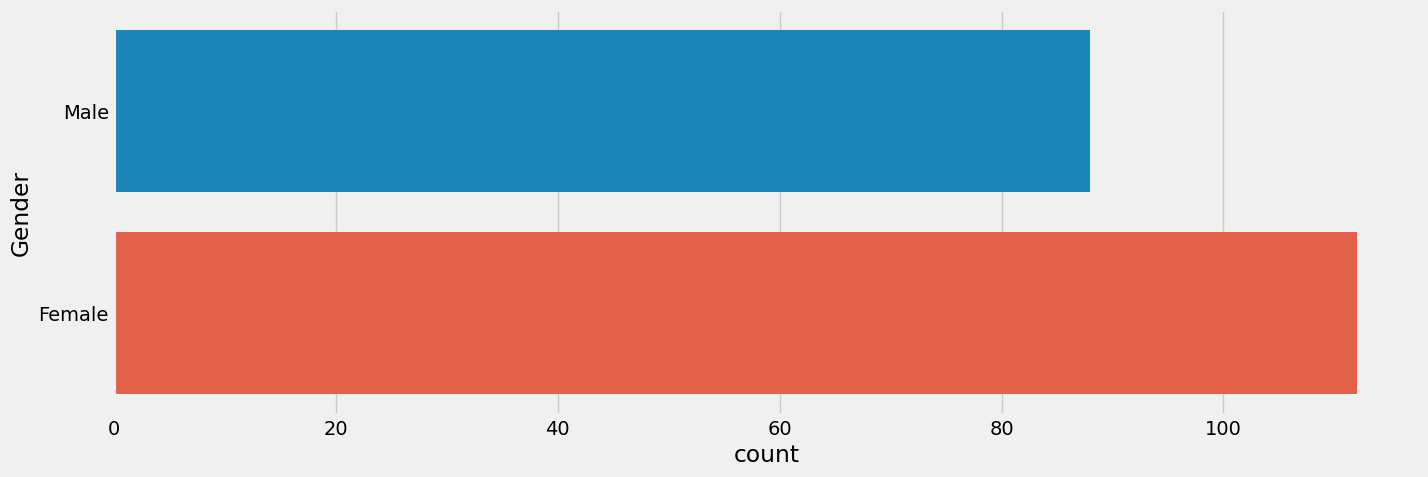

In [23]:
plt.figure(1, figsize=(15,5))
sns.countplot(y='Gender', data=df)
plt.show()

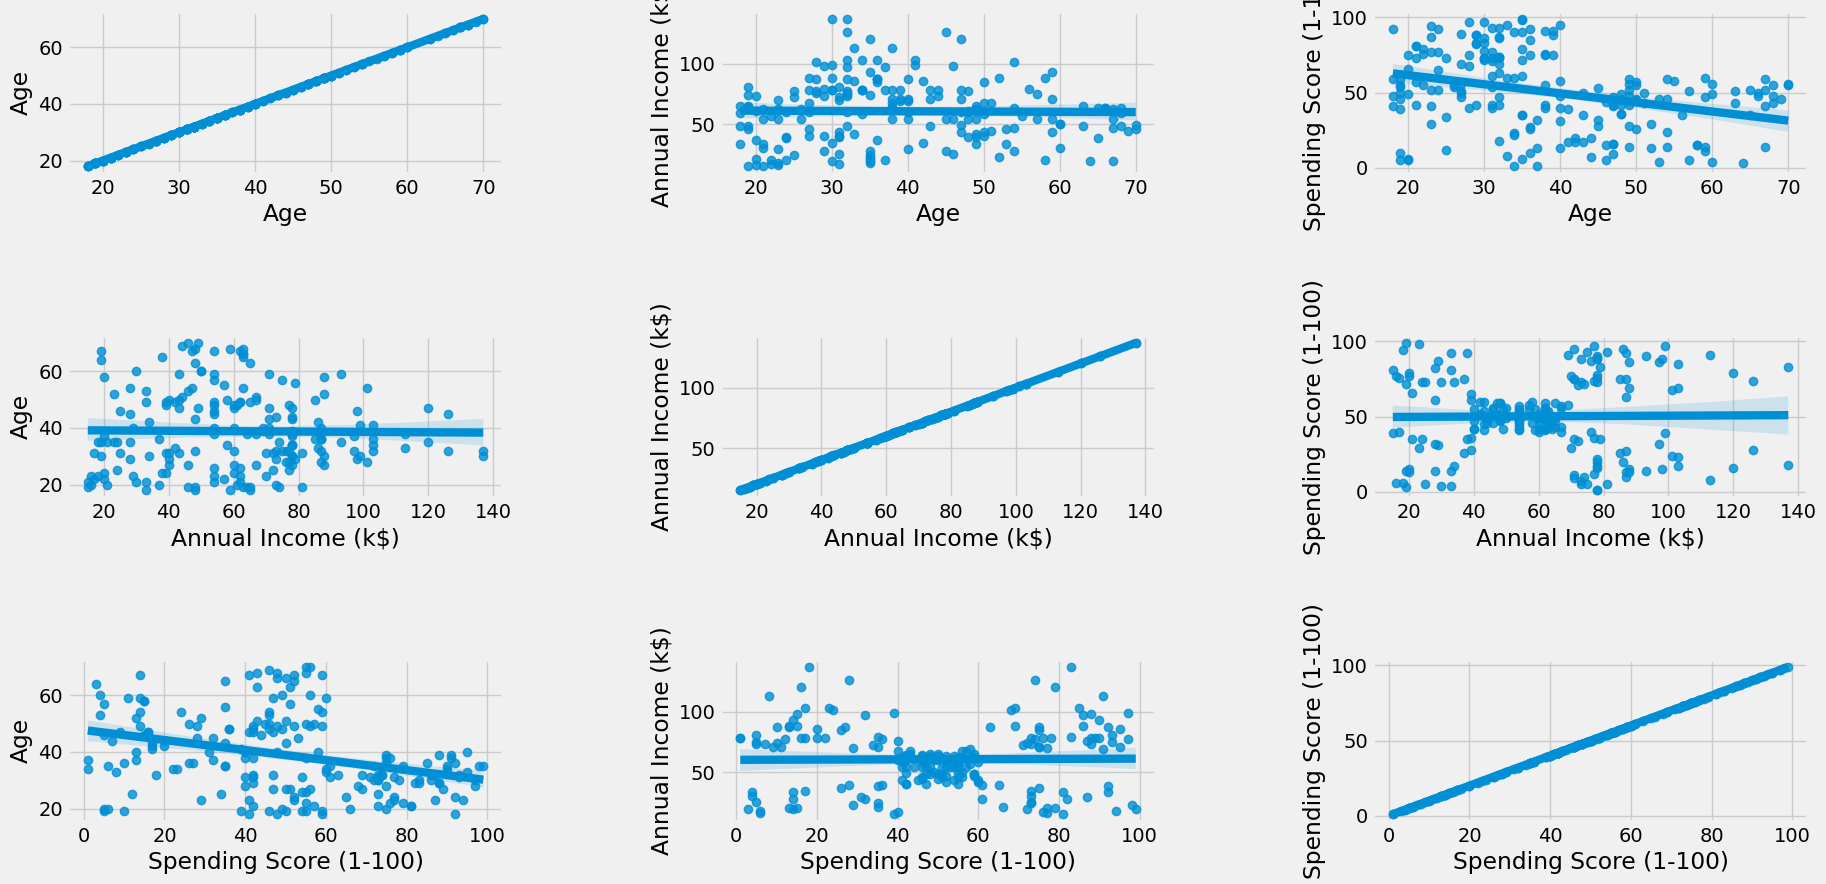

In [24]:
plt.figure(1,figsize=(20,10))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=1, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)
        #plt.ylabel(y.split()[0]+''+y.split()[1] if Len(y.split()))
plt.show()

In [25]:
from sklearn.cluster import KMeans

#clustering age dan spending

In [26]:
x1=df[['Age','Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1,11):
    algo=(KMeans(n_clusters=n,init='k-means++', n_init='warn',
                 max_iter=100, tol=0.0001, algorithm='lloyd' ))
    algo.fit(x1)
    inertia.append(algo.inertia_)

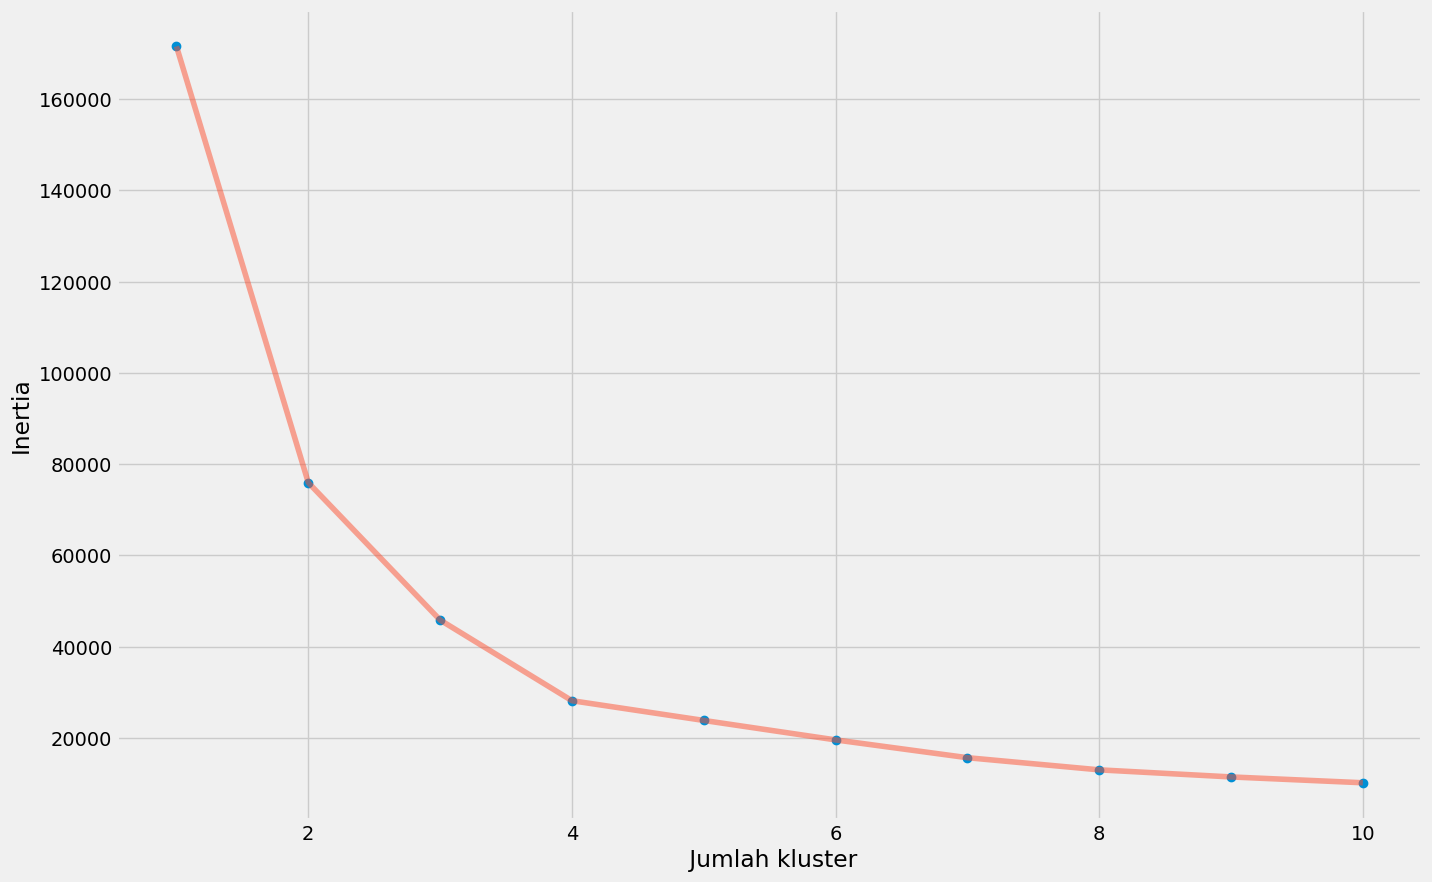

In [29]:
plt.figure(1,figsize=(15,10))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia,'-', alpha=0.5)
plt.xlabel(' Jumlah kluster'), plt.ylabel('Inertia')
plt.show()

In [30]:
df[["Age", "Spending Score (1-100)"]] = df[["Age", "Spending Score (1-100)"]].apply(pd.to_numeric)